In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor 

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [10]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [11]:
def distance(lon1, lon2, lat1, lat2):
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)

    lon = lon2 - lon1
    lat = lat2 - lat1

    a = np.sin(lat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(lon/2)**2
    c = 2*np.arcsin(np.sqrt(a))

    r = 6371
    return(round(c*r, 2))

d = []
for i in range(df.shape[0]):
    d.append(distance(df['longitude_of_pickup'][i], df['longitude_of_dropoff'][i], df['latitude_of_pickup'][i], df['latitude_of_dropoff'][i]))

In [12]:
df['distance_km'] = d

In [13]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance_km
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.03
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.45
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.39
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.80
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2.00


In [14]:
df.drop(columns=['longitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_pickup', 'latitude_of_dropoff', 'unique_id'], inplace=True)

In [15]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance_km
0,4.5,2009-06-15 17:26:21+00:00,1,1.03
1,16.9,2010-01-05 16:52:16+00:00,1,8.45
2,5.7,2011-08-18 00:35:00+00:00,2,1.39
3,7.7,2012-04-21 04:30:42+00:00,1,2.80
4,5.3,2010-03-09 07:51:00+00:00,1,2.00


In [16]:
week_name = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df['weekday_name'] = df['date_time_of_pickup'].dt.weekday.map(week_name)

In [17]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance_km,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,1.03,Sunday
1,16.9,2010-01-05 16:52:16+00:00,1,8.45,Monday
2,5.7,2011-08-18 00:35:00+00:00,2,1.39,Wednesday
3,7.7,2012-04-21 04:30:42+00:00,1,2.80,Friday
4,5.3,2010-03-09 07:51:00+00:00,1,2.00,Monday


In [18]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

df["weekday_name"] = df["weekday_name"].map(week_names_encode)

In [19]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,distance_km,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,1.03,1
1,16.9,2010-01-05 16:52:16+00:00,1,8.45,3
2,5.7,2011-08-18 00:35:00+00:00,2,1.39,6
3,7.7,2012-04-21 04:30:42+00:00,1,2.80,5
4,5.3,2010-03-09 07:51:00+00:00,1,2.00,3


In [20]:
df['Hour'] = df['date_time_of_pickup'].dt.hour
df['Month_Day'] = df['date_time_of_pickup'].dt.day


df.head()

,amount,date_time_of_pickup,no_of_passenger,distance_km,weekday_name,Hour,Month_Day
0,4.5,2009-06-15 17:26:21+00:00,1,1.03,1,17,15
1,16.9,2010-01-05 16:52:16+00:00,1,8.45,3,16,5
2,5.7,2011-08-18 00:35:00+00:00,2,1.39,6,0,18
3,7.7,2012-04-21 04:30:42+00:00,1,2.80,5,4,21
4,5.3,2010-03-09 07:51:00+00:00,1,2.00,3,7,9


In [21]:
df.drop('date_time_of_pickup', axis=1, inplace=True)

In [22]:
df.sample(10)

,amount,no_of_passenger,distance_km,weekday_name,Hour,Month_Day
49236,7.30,1,1.67,7,17,3
40722,34.54,1,7.93,6,8,21
40485,7.50,1,0.00,5,20,29
24778,5.30,1,0.73,7,14,10
8748,10.10,1,1.31,1,23,26
24701,16.10,1,7.22,5,22,14
24989,10.50,5,2.38,3,18,25
16282,7.50,1,1.66,4,21,10
11592,4.90,1,7.02,1,15,6
27088,8.50,1,4.02,3,6,17


In [23]:
df.dtypes

amount             float64
no_of_passenger      int64
distance_km        float64
weekday_name         int64
Hour                 int64
Month_Day            int64
dtype: object

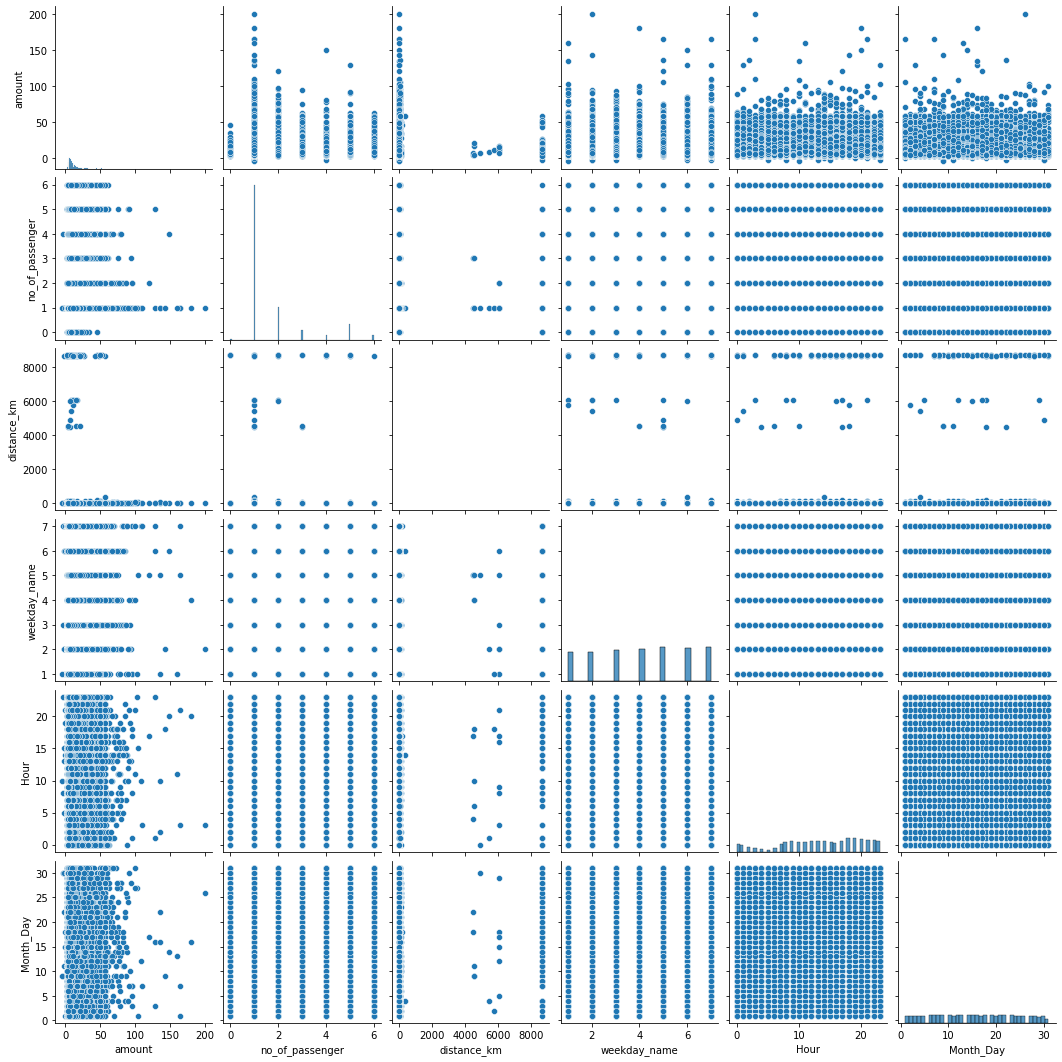

In [24]:
sns.pairplot(df)

In [25]:
from scipy.stats import zscore
df_z = df.apply(zscore)
df_z.head()

,amount,no_of_passenger,distance_km,weekday_name,Hour,Month_Day
0,-0.708709,-0.518034,-0.049159,-1.561934,0.539571,-0.077596
1,0.571561,-0.518034,-0.028290,-0.557901,0.385888,-1.232237
2,-0.584812,0.257652,-0.048146,0.948149,-2.073052,0.268796
3,-0.378317,-0.518034,-0.044181,0.446132,-1.458317,0.615188
4,-0.626111,-0.518034,-0.046431,-0.557901,-0.997266,-0.770381


Decision Tree Regression

In [26]:
x = df.drop(['amount'], axis=1)
y = df[['amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

tree_reg = DecisionTreeRegressor(max_depth=6, random_state=1)
tree_reg.fit(x_train, y_train)

tree_reg.score(x_train, y_train)

0.7402551283712773

In [27]:
tree_reg.score(x_test, y_test)


0.7119946540850012

In [28]:
predict = tree_reg.predict(x_test)
r2_score(y_test, predict)


0.7119946540850012

Random Forest Regression

In [29]:
ran_reg = RandomForestRegressor(max_depth=6, random_state=1)
ran_reg.fit(x_train, y_train)

ran_reg.score(x_train, y_train)

0.7502245584139986

In [30]:
ran_reg.score(x_test, y_test)


0.7128389468199233

In [31]:
predict = ran_reg.predict(x_test)
r2_score(y_test, predict)

0.7128389468199233

AdaBoost Regression

In [32]:
ada_reg = AdaBoostRegressor(n_estimators=100)
ada_reg.fit(x_train, y_train)

ada_reg.score(x_train, y_train)

0.6170166985356149

In [33]:
ada_reg.score(x_test, y_test)


0.577701086333303

In [34]:
predict = ada_reg.predict(x_test)
r2_score(y_test, predict)

0.577701086333303

Bagging Regression

In [35]:
bag_reg = BaggingRegressor(max_features=5, max_samples=1000)
bag_reg.fit(x_train, y_train)

bag_reg.score(x_train, y_train)

0.7174134223987174

In [36]:
bag_reg.score(x_test, y_test)


0.6893713698474511

In [37]:
predict = bag_reg.predict(x_test)
r2_score(y_test, predict)

0.6893713698474511